In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('./data/developer_survey_2019/survey_results_public.csv')

In [3]:
sat_mapper_lut = {
    'Very dissatisfied' : 0,
    'Slightly dissatisfied' : 0.25,
    'Neither satisfied nor dissatisfied' : 0.5,
    'Slightly satisfied' : 0.75,
    'Very satisfied' : 1,
}

## Age vs Job Satisfaction

In [4]:
years_vs_sat = df[['YearsCodePro','JobSat']].dropna(how='any')
years_vs_sat = years_vs_sat[years_vs_sat['YearsCodePro'] != 'Less than 1 year']
years_vs_sat = years_vs_sat[years_vs_sat['YearsCodePro'] != 'More than 50 years']
years_vs_sat['YearsCodePro'] = pd.to_numeric(years_vs_sat['YearsCodePro'])

In [5]:
years_vs_sat['JobSatNum'] = years_vs_sat.apply(lambda row: sat_mapper_lut[row['JobSat']], axis=1)
years_vs_sat[['YearsCodePro','JobSatNum']].head()

YearsCodePro  JobSatNum
2             1       0.75
4             9       0.25
5             3       0.75
6             4       0.50
8             4       0.75

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028464AC6CF8>,
      dtype=object)

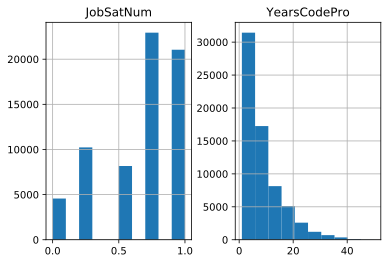

In [6]:
years_vs_sat[['YearsCodePro','JobSatNum']].hist()

In [7]:
years_vs_sat[['YearsCodePro','JobSatNum']].corr()

YearsCodePro  JobSatNum
YearsCodePro      1.000000   0.032008
JobSatNum         0.032008   1.000000

In [8]:
years_vs_sat[['YearsCodePro','JobSatNum']].plot.scatter(x='YearsCodePro',y='JobSatNum')

## Conclusion
No correlation

## Country Vs Job Satisfaction

In [9]:
country_vs_sat = df[['Country','JobSat']].dropna(how='any')
country_vs_sat['JobSatNum'] = country_vs_sat.apply(lambda row: sat_mapper_lut[row['JobSat']], axis=1)
country_vs_sat[['Country','JobSatNum']].head()

Country  JobSatNum
2       Thailand       0.75
3  United States       0.75
4        Ukraine       0.25
5         Canada       0.75
6        Ukraine       0.50

In [10]:
grouped = country_vs_sat.groupby('Country')
substantial = grouped.count()['JobSatNum'] > 100
mean = grouped.mean()[substantial].sort_values('JobSatNum')

In [11]:
def normalize_key(v,k):
    v[k] = (v[k] - v[k].min())/(v[k].max() - v[k].min())
    return v

In [12]:
mean = normalize_key(mean,'JobSatNum')
mean

JobSatNum
Country                        
China                  0.000000
Taiwan                 0.147104
Nepal                  0.214753
Viet Nam               0.243299
Turkey                 0.266188
Iran                   0.266671
Malaysia               0.285671
Bangladesh             0.319892
Japan                  0.359525
Mexico                 0.366025
Indonesia              0.382745
Italy                  0.395945
Hong Kong (S.A.R.)     0.398233
Colombia               0.407482
India                  0.419586
Latvia                 0.435484
United Arab Emirates   0.439852
Brazil                 0.448673
Nigeria                0.453666
Egypt                  0.462067
Spain                  0.464693
Argentina              0.498138
Romania                0.499932
Chile                  0.500701
Kenya                  0.504356
Russian Federation     0.507866
Portugal               0.511377
Philippines            0.515313
Belarus                0.521443
Sri Lanka              0.529615
...                         ...
Singapore              0.568548
South Africa           0.607181
Ukraine                0.610946
Poland                 0.619166
France                 0.630318
Hungary                0.632095
Serbia                 0.641925
Lithuania              0.642937
Germany                0.680591
New Zealand            0.683575
Bulgaria               0.690825
Uruguay                0.712632
Switzerland            0.714729
Croatia                0.719758
Czech Republic         0.730090
Slovakia               0.736617
Israel                 0.737938
Austria                0.739011
United Kingdom         0.750469
Belgium                0.757983
Slovenia               0.770064
Australia              0.773291
Denmark                0.839240
Estonia                0.851142
Canada                 0.851275
United States          0.853374
Finland                0.855871
Netherlands            0.869588
Sweden                 0.878872
Norway                 1.000000

[65 rows x 1 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284625567B8>]],
      dtype=object)

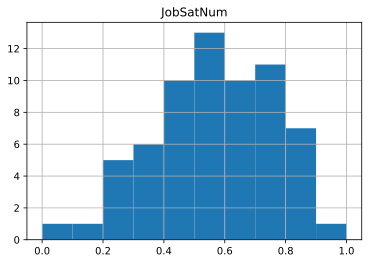

In [13]:
mean.hist()

## Conclusion
Nordic countries and english speaking western countries have the highest job satisfaction. South east asian countries have the worst.

## Organisation size vs Job satisfaction

In [14]:
orgsize_vs_sat = df[['OrgSize','JobSat']].dropna(how='any')
orgsize_vs_sat['JobSatNum'] = orgsize_vs_sat.apply(lambda row: sat_mapper_lut[row['JobSat']], axis=1)
orgsize_vs_sat[['OrgSize','JobSatNum']].head()

OrgSize  JobSatNum
2                               100 to 499 employees       0.75
3                               100 to 499 employees       0.75
4                           10,000 or more employees       0.25
6  Just me - I am a freelancer, sole proprietor, ...       0.50
8                                 10 to 19 employees       0.75

In [15]:
grouped = orgsize_vs_sat.groupby('OrgSize')
substantial = grouped.count()['JobSatNum'] > 100
mean = grouped.mean()[substantial].sort_values('JobSatNum')
mean

JobSatNum
OrgSize                                                      
10,000 or more employees                             0.659699
5,000 to 9,999 employees                             0.665565
Just me - I am a freelancer, sole proprietor, etc.   0.667778
10 to 19 employees                                   0.670058
1,000 to 4,999 employees                             0.674366
20 to 99 employees                                   0.674667
500 to 999 employees                                 0.674915
100 to 499 employees                                 0.675155
2-9 employees                                        0.679215

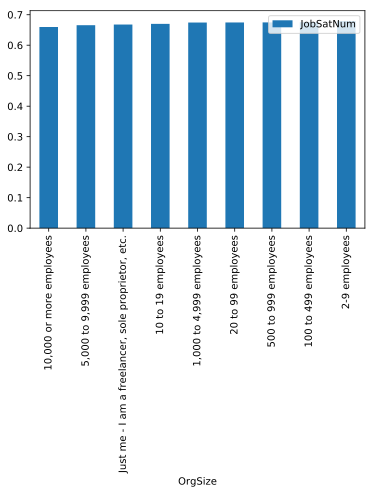

In [16]:
mean.plot.bar()

## Conclusion
Smaller orgs tend to do marginally better but not significantly

## Manager vs job satisfaction

In [17]:
df['MgrIdiot'].unique()

array([nan, 'Not at all confident', 'Very confident',
       'Somewhat confident', "I don't have a manager"], dtype=object)

In [18]:
mgr_lut = {
    'Not at all confident' : 0,
    'Somewhat confident' : 0.5,
    'Very confident' : 1,
}

In [19]:
country_vs_mgr = df[['Country','MgrIdiot','JobSat']].dropna(how='any')
country_vs_mgr = country_vs_mgr[country_vs_mgr['MgrIdiot'] != "I don't have a manager"]
country_vs_mgr['MgrIdiotNum'] = country_vs_mgr.apply(lambda row: mgr_lut[row['MgrIdiot']], axis=1)
country_vs_mgr['JobSatNum'] = country_vs_mgr.apply(lambda row: sat_mapper_lut[row['JobSat']], axis=1)
country_vs_mgr[['Country','MgrIdiotNum','JobSatNum']].head()

Country  MgrIdiotNum  JobSatNum
2       Thailand          0.0       0.75
3  United States          1.0       0.75
4        Ukraine          0.5       0.25
5         Canada          1.0       0.75
8    New Zealand          0.5       0.75

In [20]:
grouped = country_vs_mgr.groupby('Country')
substantial = grouped.count()['MgrIdiotNum'] > 100
mean = grouped.mean()[substantial].sort_values('MgrIdiotNum')
mean = normalize_key(mean, 'JobSatNum')
mean = normalize_key(mean, 'MgrIdiotNum')
mean

MgrIdiotNum  JobSatNum
Country                                     
Japan                    0.000000   0.437870
Italy                    0.131203   0.411644
Turkey                   0.163188   0.267420
Nepal                    0.165594   0.247079
China                    0.173764   0.000000
Greece                   0.210524   0.552513
Hong Kong (S.A.R.)       0.227706   0.363455
Taiwan                   0.281875   0.161380
Malaysia                 0.298092   0.394387
Slovakia                 0.304693   0.758229
Indonesia                0.337655   0.371425
Hungary                  0.341807   0.601075
Spain                    0.369761   0.477168
Egypt                    0.377392   0.426037
Chile                    0.389753   0.441371
Brazil                   0.407358   0.477848
Iran                     0.410897   0.329622
Romania                  0.414993   0.518134
Croatia                  0.424934   0.694249
Belgium                  0.425541   0.751155
Poland                   0.426016   0.659698
Germany                  0.437282   0.693138
Ukraine                  0.448264   0.723900
Singapore                0.454831   0.601197
Viet Nam                 0.462767   0.257694
United Arab Emirates     0.472908   0.405966
Bulgaria                 0.474693   0.694967
Belarus                  0.495383   0.577270
Russian Federation       0.501265   0.565270
Serbia                   0.518230   0.617467
...                           ...        ...
Argentina                0.526715   0.562517
Czech Republic           0.534133   0.691858
Portugal                 0.554642   0.557414
Sweden                   0.558915   0.895103
Netherlands              0.564159   0.875290
France                   0.575983   0.623842
Denmark                  0.585925   0.855944
Switzerland              0.615965   0.698223
Slovenia                 0.630771   0.798660
India                    0.641467   0.436701
Finland                  0.643714   0.849488
Ireland                  0.657829   0.583660
Austria                  0.671128   0.723862
Lithuania                0.677107   0.733797
Mexico                   0.677755   0.388106
Norway                   0.703670   1.000000
Philippines              0.732016   0.610207
Sri Lanka                0.752759   0.540310
United Kingdom           0.777798   0.772969
New Zealand              0.805531   0.705385
Colombia                 0.831791   0.551401
Nigeria                  0.839482   0.430288
Bangladesh               0.842789   0.348211
Australia                0.844713   0.812086
Pakistan                 0.853621   0.547459
South Africa             0.876975   0.627562
Israel                   0.919202   0.779260
Estonia                  0.932126   0.826126
Canada                   0.936668   0.892739
United States            1.000000   0.883989

[61 rows x 2 columns]

In [21]:
mean.corr()

MgrIdiotNum  JobSatNum
MgrIdiotNum     1.000000   0.546675
JobSatNum       0.546675   1.000000

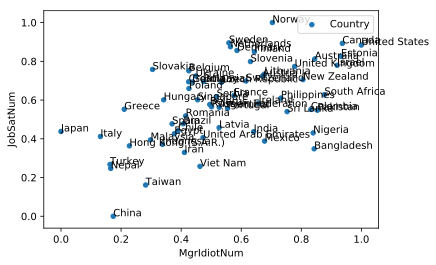

In [22]:
fig, ax = plt.subplots()
mean.plot.scatter(x='MgrIdiotNum',y='JobSatNum',label='Country', ax=ax)

for k, v in mean.iterrows():
    ax.annotate(k, v)

In [23]:
country_vs_mgr.corr()

MgrIdiotNum  JobSatNum
MgrIdiotNum     1.000000   0.380472
JobSatNum       0.380472   1.000000

## Conclusion
Leadership competence and job satisfaction have a strong correlation.